# Bachelor project: Swarm data
This use panda and my new fuctions to plot the data and half orbit means

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
os.chdir('/home/simon/Desktop/Bachelor_project/code')
import My_functions_v2 as my
import matplotlib.pyplot as plt

## FAC_A and FAC_C and DNS

In [2]:
DNS = my.load_DNS()
DNS = DNS.dropna(how='any')
my.add_orbit(DNS)

In [3]:
FACA = my.load_FAC('A')
# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FACA_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FACA.index,method='nearest')
FACA = pd.concat([FACA,FACA_add_Orbit], axis=1)

FACA.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_A.pkl')

In [4]:
del FACA

In [5]:
FACC = my.load_FAC('C')

# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FACC_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FACC.index,method='nearest')
FACC = pd.concat([FACC,FACC_add_Orbit], axis=1)

FACC.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_C.pkl')


In [6]:
# Free up some memory
del FACC

## Load the data

In [7]:
FAC = my.load_FAC('dual')
FAC = FAC.dropna(how='any')

# Adds orbit to FAC based on DNS so orbit nr alling even tho there is data gab in FAC
FAC_add_Orbit = DNS.loc[:,['Orbit_nr','Hemisphere']].reindex(FAC.index,method='nearest')
FAC = pd.concat([FAC,FAC_add_Orbit], axis=1)


## save unfiltered data

In [8]:
FAC.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_dual.pkl')
DNS.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

## Filter FAC

In [9]:
FAC_filter= my.filter_FAC(FAC,dt = 5 ,Flags_B=10002,Flags_q=440404)

1200 observation out off 3802595 are removed


In [10]:
FAC_filter.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')

## Electro jets

In [3]:
Electro_jets = my.get_jets(FAC_filter) 

Add solar time

In [4]:
solar_time = DNS.Local_solar_time.reindex(Electro_jets.index,method='nearest')
Electro_jets = pd.concat([Electro_jets,solar_time], axis=1)

Save the file

In [5]:
Electro_jets.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/Electro_jets.pkl')

## Half orbit means
Calculate the half orbit means

In [2]:
#FAC_filter = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
#DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

In [4]:
FAC_mean=my.orbit_means(FAC_filter)
FAC_power = my.orbit_means(FAC_filter,mode='power')
DNS_mean=my.orbit_means(DNS)

Remove all half orbits with times that diviates more than 6 min

In [6]:
N_FAC = len(FAC_mean)
N_power = len(FAC_power)
N_DNS = len(DNS_mean)

In [7]:
FAC_mean=FAC_mean.loc[abs(FAC_mean.Delta_time-FAC_mean.Delta_time.median())<360]
FAC_power=FAC_power.loc[abs(FAC_power.Delta_time-FAC_power.Delta_time.median())<360]
DNS_mean=DNS_mean.loc[abs(DNS_mean.Delta_time-DNS_mean.Delta_time.median())<360]

In [8]:
print("FAC: %d orbits out of %d removed" % (N_FAC-len(FAC_mean),N_FAC))
print("FAC_power: %d orbits out of %d removed" % (N_power-len(FAC_power),N_power))
print("DNS: %d orbits out of %d removed" % (N_DNS-len(DNS_mean),N_DNS))

FAC: 54 orbits out of 1732 removed
FAC_power: 54 orbits out of 1732 removed
DNS: 24 orbits out of 1732 removed


## Allign the time index

In [11]:
df1 = FAC_mean.FAC.reindex(DNS_mean.index,method='nearest')
df1.name = 'FAC'

df2 = FAC_power.FAC.reindex(DNS_mean.index,method='nearest')
df2.name = 'FAC_power'

df_allign = pd.concat([df1,df2,DNS_mean.iloc[:,0:4]], axis=1)


<IPython.core.display.Javascript object>


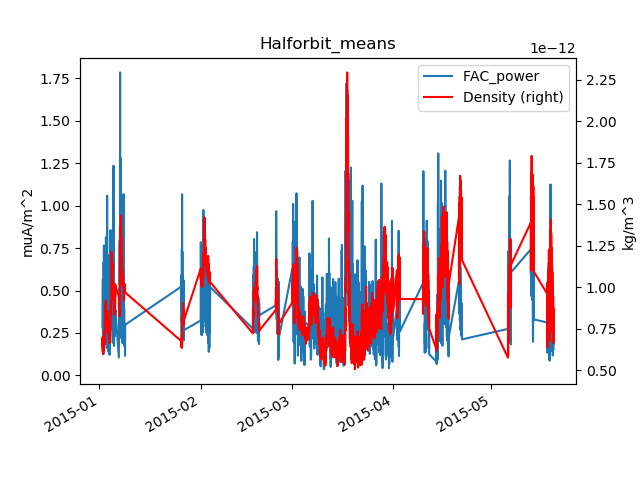

Text(0.5,1,'Halforbit_means')

In [13]:
%matplotlib notebook
plt.figure()

p1 = df_allign.FAC_power.plot(legend=True)
p2 = df_allign.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Halforbit_means')

## Save data for easy acces 

In [14]:
df_allign.to_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_means.pkl')